# Dataset Cleaning and Wrangling

Original Dataset Available at
https://www.kaggle.com/datasets/rishidamarla/espn-cricket-players

Deliverable 1

In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
input_file = 'SuperCleaned.csv'
output_file = 'Cleaned-Cricket-Dataset.csv'

# Load the CSV file into a pandas DataFrame.
df = pd.read_csv(input_file)

# Select the columns containing batting and bowling data.
batting_columns = df.columns[14:]

# Convert the selected columns to numeric type, replacing non-numeric values with NaN.
df[batting_columns] = df[batting_columns].apply(pd.to_numeric, errors='coerce')

# Create a condition to filter rows where either batting or bowling data is available.
condition = (df[batting_columns] > 0).any(axis=1)

# Filter the DataFrame based on the condition.
filtered_df = df[condition]

filtered_df.drop('Date_of_death', axis=1, inplace=True)

filtered_df.dropna(subset=['Birthdate', 'Birthplace'], how='any', inplace=True)

# Calculate the threshold for retaining columns (99% of non-null values).
threshold = 0.85 * len(filtered_df)

# Drop columns with more than the threshold number of missing values.
filtered_df.dropna(axis=1, thresh=threshold, inplace=True)

filtered_df.dropna(how='any', inplace=True)

filtered_df.drop(df.filter(regex="Unname"),axis=1, inplace=True)

filtered_df['ID'] = range(1, len(filtered_df) + 1)

# Save the filtered DataFrame to a new CSV file.
#filtered_df.to_csv(output_file, index=False)


<ipython-input-2-07c99ef72f6f>:5: DtypeWarning: Columns (101,107,108,140,141,145,146,147,153,154,158,159,160) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(input_file)
<ipython-input-2-07c99ef72f6f>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.drop('Date_of_death', axis=1, inplace=True)
<ipython-input-2-07c99ef72f6f>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.dropna(subset=['Birthdate', 'Birthplace'], how='any', inplace=True)
<ipython-input-2-07c99ef72f6f>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

In [3]:
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

numeric_columns = filtered_df.select_dtypes(include=['number']).columns

# Apply Min-Max scaling to the selected columns
filtered_df[numeric_columns] = scaler.fit_transform(filtered_df[numeric_columns])


<ipython-input-3-65e7b93fd6c8>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df[numeric_columns] = scaler.fit_transform(filtered_df[numeric_columns])


In [4]:
#filtered_df['ID'] = range(1, len(filtered_df) + 1)

In [5]:
# Assuming df is your DataFrame
columns_to_drop = ['Birthdate', 'Birthplace', 'Died', 'Age','ID','BATTING_First-class_Ct', 'BATTING_First-class_St', 'BOWLING_First-class_Mat']

filtered_df.drop(columns=columns_to_drop, inplace=True)

<ipython-input-5-7cbdf8314abc>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.drop(columns=columns_to_drop, inplace=True)


In [6]:
filtered_df.rename(columns={'BATTING_First-class_Mat': 'Matches'}, inplace=True)
filtered_df.rename(columns={'BATTING_First-class_Inns': 'Innings'}, inplace=True)
filtered_df.rename(columns={'BATTING_First-class_NO': 'In-At Number'}, inplace=True)
filtered_df.rename(columns={'BATTING_First-class_Runs': 'Runs'}, inplace=True)
filtered_df.rename(columns={'BATTING_First-class_Ave': 'Average'}, inplace=True)
filtered_df.rename(columns={'BATTING_First-class_100': 'Centuries'}, inplace=True)

<ipython-input-6-f0795cf32227>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.rename(columns={'BATTING_First-class_Mat': 'Matches'}, inplace=True)
<ipython-input-6-f0795cf32227>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.rename(columns={'BATTING_First-class_Inns': 'Innings'}, inplace=True)
<ipython-input-6-f0795cf32227>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.rename(columns={'BATTING

In [7]:
# Create a list of countries to keep
countries_to_keep = ['England', 'India', 'Pakistan', 'Australia', 'New Zealand', 'South Africa', 'Sri Lanka', 'West Indies']

# Filter the DataFrame
filtered_df.drop(filtered_df[~filtered_df['COUNTRY'].isin(countries_to_keep)].index, inplace=True)

<ipython-input-7-0074792332ff>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.drop(filtered_df[~filtered_df['COUNTRY'].isin(countries_to_keep)].index, inplace=True)


In [8]:
player_with_unusual_style = filtered_df[filtered_df['Batting style'] == 'Right-hand bat, Right-hand bat']
player_name = player_with_unusual_style['NAME'].values[0]

print("Player with unusual style:", player_name)

Player with unusual style: Kalum Fernando


In [9]:
# Identify the row with the unusual batting style
index_to_remove = filtered_df[filtered_df['Batting style'] == 'Right-hand bat, Right-hand bat'].index[0]

# Remove the row from the DataFrame
filtered_df = filtered_df.drop(index_to_remove)

# Reset the index of the DataFrame
filtered_df.reset_index(drop=True, inplace=True)

In [10]:
filtered_df.to_csv(output_file, index=False)

# Exploratory Data Analysis

Deliverable 2

In [11]:
df = pd.read_csv('Cleaned-Cricket-Dataset.csv')

In [12]:
batting_style = df['Batting style']
batting_style_counts = batting_style.value_counts()
batting_style_counts

Right-hand bat    23101
Left-hand bat      4832
Name: Batting style, dtype: int64

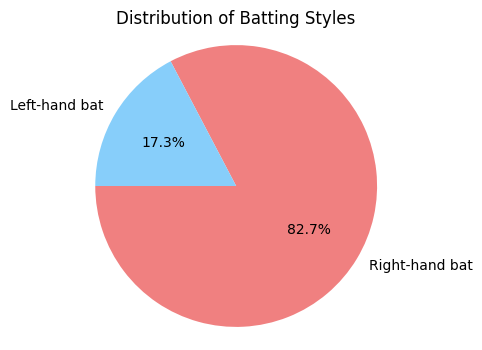

In [13]:
# Create a pie chart
plt.figure(figsize=(4, 4))  # Adjust the figure size as needed

# Define colors for the pie chart (optional)
colors = ['lightcoral', 'lightskyblue']

# Create the pie chart
plt.pie(batting_style_counts, labels=batting_style_counts.index, autopct='%1.1f%%', colors=colors, startangle=180)

# Add a title
plt.title('Distribution of Batting Styles')

# Display the pie chart
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.
plt.show()

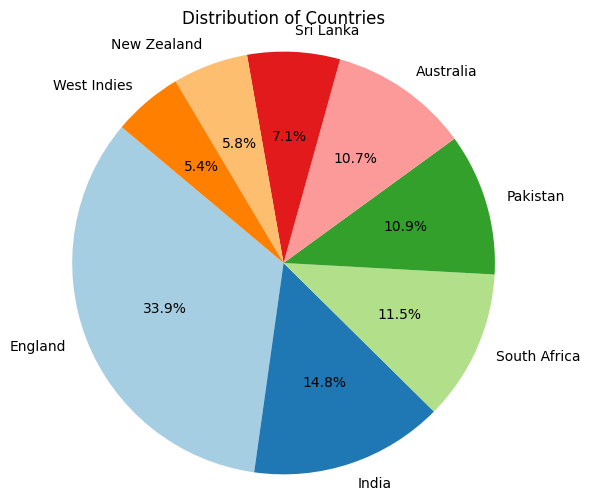

In [14]:
# Extract the "COUNTRY" column
countries = df['COUNTRY']

# Calculate the frequency of each country
country_counts = countries.value_counts()

# Create a pie chart for the country distribution
plt.figure(figsize=(6, 6))  # Adjust the figure size as needed

# You can choose a colormap for the pie chart; here, we'll use a random one.
colors = plt.cm.Paired(range(len(country_counts)))

# Create the pie chart
plt.pie(country_counts, labels=country_counts.index, autopct='%1.1f%%', colors=colors, startangle=140)

# Add a title
plt.title('Distribution of Countries')

# Display the pie chart
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.
plt.show()

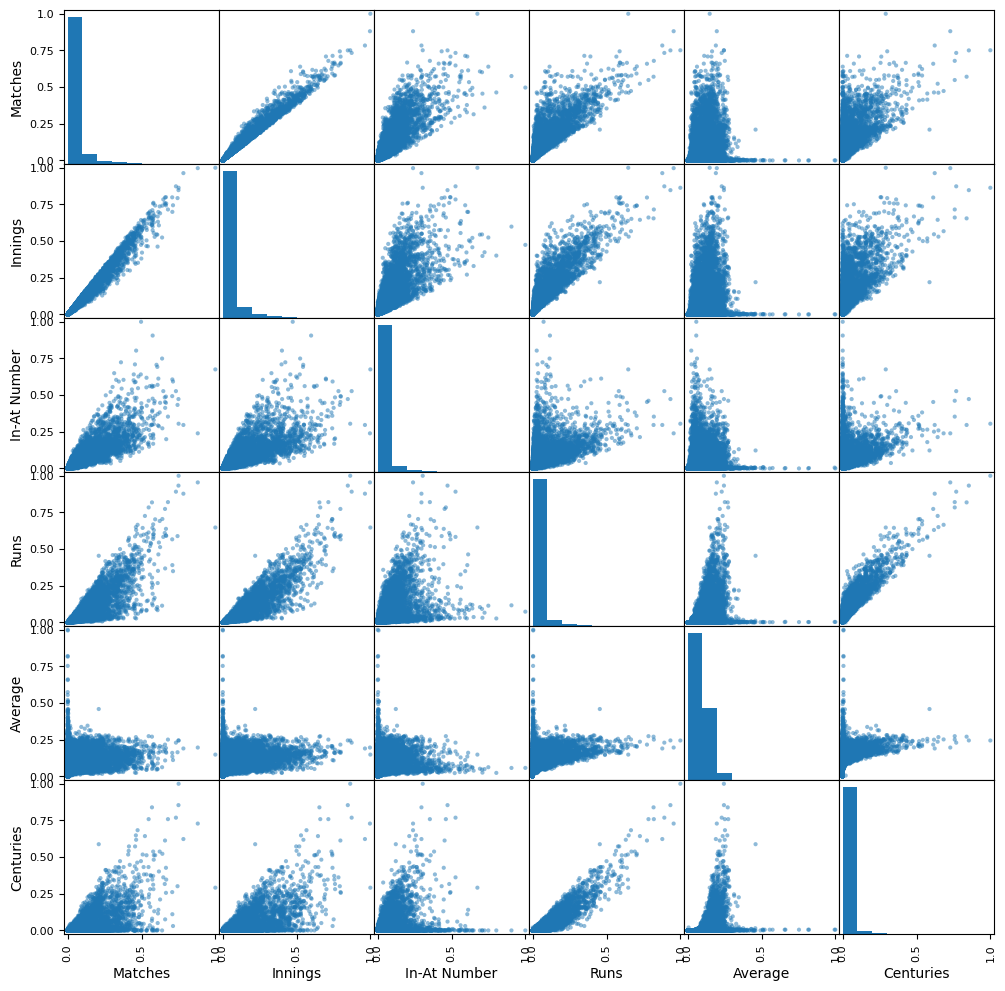

In [15]:
pd.plotting.scatter_matrix(df,figsize=(12, 12))
plt.show()

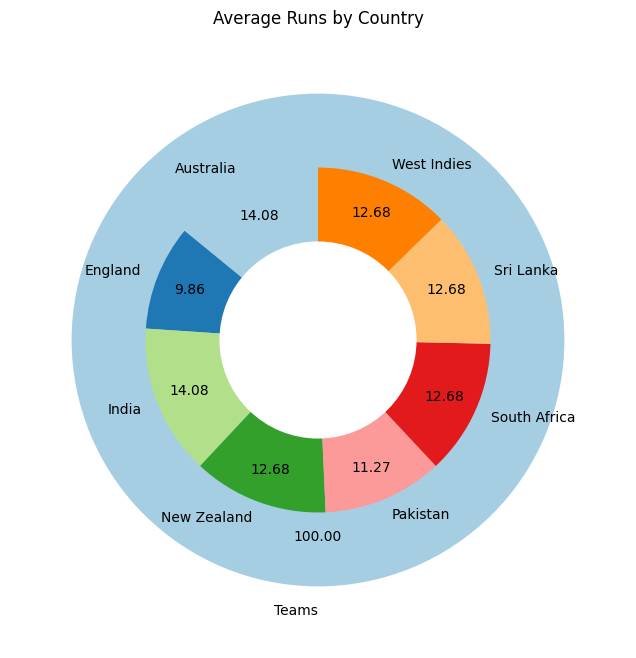

In [16]:
data = df

# Calculate the average runs for each country
country_means = data.groupby('COUNTRY')['Average'].mean()

# Create a donut pie chart
plt.figure(figsize=(8, 8))

# Outside donut
outside_labels = ["Teams"]
outside_values = [data['COUNTRY'].nunique()]  # Use nunique() to count unique countries
outside_colors = plt.cm.Paired(np.arange(len(outside_labels)))

ins = plt.pie(outside_values, labels=outside_labels, autopct="%0.2f", pctdistance=0.80, startangle=90, colors=outside_colors)

# Inside donut
inside_labels = [country for country in country_means.index]
inside_values = [round(mean, 2) for mean in country_means]
inside_colors = plt.cm.Paired(np.arange(len(inside_labels)))

out = plt.pie(inside_values, labels=inside_labels, autopct="%0.2f", radius=0.7, pctdistance=0.80, startangle=90, colors=inside_colors)

hole = plt.Circle((0, 0), 0.4, color='white', linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(hole)

plt.title("Average Runs by Country")

plt.show()

In [17]:
country_innings = data.groupby('COUNTRY')['Innings'].sum()

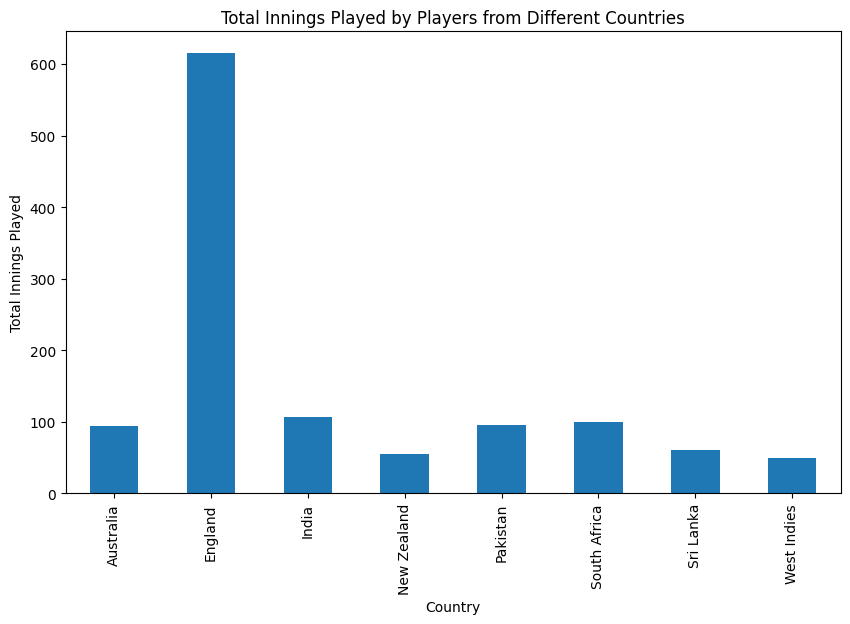

In [18]:
plt.figure(figsize=(10, 6))  # Set the figure size
country_innings.plot(kind='bar')
plt.title("Total Innings Played by Players from Different Countries")
plt.xlabel("Country")
plt.ylabel("Total Innings Played")
plt.show()

# Machine Learning Model

In [31]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Load your dataset (replace 'your_data.csv' with your actual data file)
# The dataset should contain columns like Matches, Innings, In-At Number, Average, Centuries, and Runs.
# Adjust the column names and data types as needed.
df = pd.read_csv("./Cleaned-Cricket-Dataset.csv")

# Preprocess the data
X = df[['Matches', 'Innings', 'In-At Number', 'Average', 'Centuries']]
y = df['Runs']

# Standardize numerical features
numeric_features = X.select_dtypes(include=[np.number]).columns
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Create a preprocessor for numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)
    ])

# Build the neural network model
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)  # Output layer with a single neuron for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Fit the model to the entire dataset
model.fit(preprocessor.fit_transform(X), y, epochs=100, batch_size=32)



Epoch 1/100
873/873 [==============================] - 2s 1ms/step - loss: 6.5080e-04
Epoch 2/100
873/873 [==============================] - 1s 2ms/step - loss: 2.4872e-04
Epoch 3/100
873/873 [==============================] - 1s 2ms/step - loss: 7.5393e-05
Epoch 4/100
873/873 [==============================] - 1s 1ms/step - loss: 1.2134e-04
Epoch 5/100
873/873 [==============================] - 1s 1ms/step - loss: 8.7378e-05
Epoch 6/100
873/873 [==============================] - 1s 1ms/step - loss: 4.3980e-05
Epoch 7/100
873/873 [==============================] - 1s 1ms/step - loss: 3.8804e-05
Epoch 8/100
873/873 [==============================] - 1s 1ms/step - loss: 3.8229e-05
Epoch 9/100
873/873 [==============================] - 1s 1ms/step - loss: 4.4383e-05
Epoch 10/100
873/873 [==============================] - 1s 1ms/step - loss: 1.7467e-05
Epoch 11/100
873/873 [==============================] - 1s 1ms/step - loss: 1.9504e-05
Epoch 12/100
873/873 [==============================

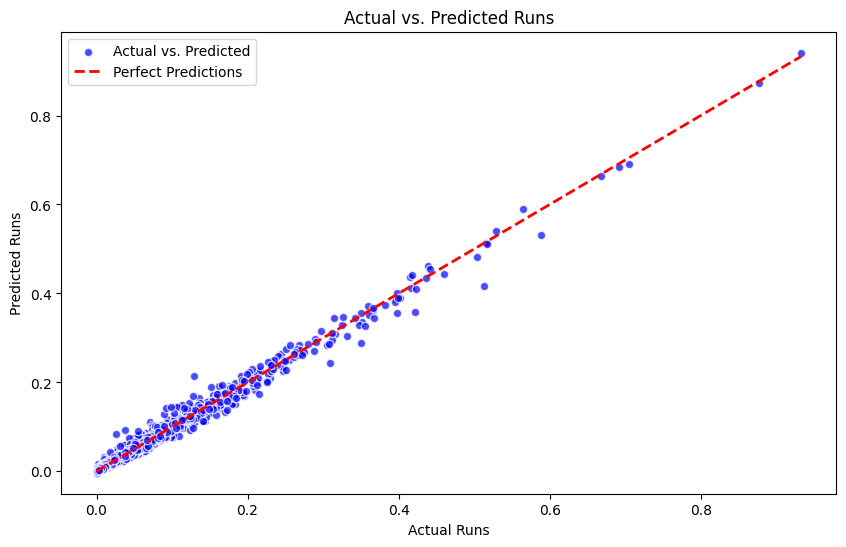

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the actual vs. predicted runs
plt.figure(figsize=(10, 6))

# Scatter plot of actual vs. predicted runs
plt.scatter(y_test, y_pred, alpha=0.7, color='blue', edgecolors='w', label='Actual vs. Predicted')

# Diagonal line for reference (perfect predictions)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2, label='Perfect Predictions')

plt.title('Actual vs. Predicted Runs')
plt.xlabel('Actual Runs')
plt.ylabel('Predicted Runs')
plt.legend()
plt.show()

In [33]:
# Now, get input from the user
matches = int(input('Enter the number of Matches: '))
innings = int(input('Enter the number of Innings: '))
inat_number = int(input('Enter the In-At Number: '))
average = float(input('Enter the Average: '))
centuries = int(input('Enter the number of Centuries: '))

# Transform the user input for prediction
user_input = pd.DataFrame([[matches, innings, inat_number, average, centuries]], columns=X.columns)

# Use the model to predict runs
predicted_runs = model.predict(preprocessor.transform(user_input))

# Display the result to the user
print(f'Predicted Runs: {predicted_runs[0, 0]}')

Enter the number of Matches: 70
Enter the number of Innings: 65
Enter the In-At Number: 3
Enter the Average: 46
Enter the number of Centuries: 24
1/1 [==============================] - 0s 191ms/step
Predicted Runs: 138.5730743408203


In [35]:
model.save('cricket-model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
